In [1]:
import sys
sys.path.append('..')
from config_parser import parse_opera_config
import matplotlib.pyplot as plt

In [2]:
config_file = "../configs/tristan_spanish.yaml"

config = parse_opera_config(config_file)

# Ensure all case variations of character names are included
CHARACTER_NAMES = [
    *config.character_names,
    *[name.lower() for name in config.character_names],
    *[name.upper() for name in config.character_names]
]

In [3]:
def plot_length_ratios(lines_de, lines_en):
    length_ratios = [len(de) / len(en) for de, en in zip(lines_de, lines_en)]
    # print a chart of length_ratios

    # Plot the length ratios
    plt.figure(figsize=(10, 5))
    plt.plot(length_ratios)
    plt.title(f'Length Ratios of {config.language} and en Lines')
    plt.xlabel('Line Number')
    plt.ylabel('Length Ratio')
    plt.grid(True)
    plt.show()

    # Find the index where the length ratios start to deviate significantly
    threshold = 1.5  # Adjust this threshold as needed
    deviation_index = next((i for i, ratio in enumerate(length_ratios) if abs(ratio - 1) > threshold), None)

    if deviation_index is not None:
        print(f"Significant deviation starts at line {deviation_index}")
        print(f"{config.language} line: {lines_de[deviation_index]}")
        print(f"en line: {lines_en[deviation_index]}")
    else:
        print("No significant deviation found.")

def pair_libretto_lines_simple(german_text, english_text):
    lines_de = german_text.split("\n\n")
    lines_en = english_text.split("\n\n")

    # Remove empty lines
    lines_de = [line for line in lines_de if line.strip()]
    lines_en = [line for line in lines_en if line.strip()]

    print(len(lines_de), len(lines_en))

    # print the average length of each german line
    print(sum(len(line) for line in lines_de) / len(lines_de))
    print(sum(len(line) for line in lines_en) / len(lines_en))

    print(len(lines_de), len(lines_en))

    plot_length_ratios(lines_de, lines_en)

    return list(zip(lines_de, lines_en))

526 530
123.68441064638783
125.19433962264151
526 530


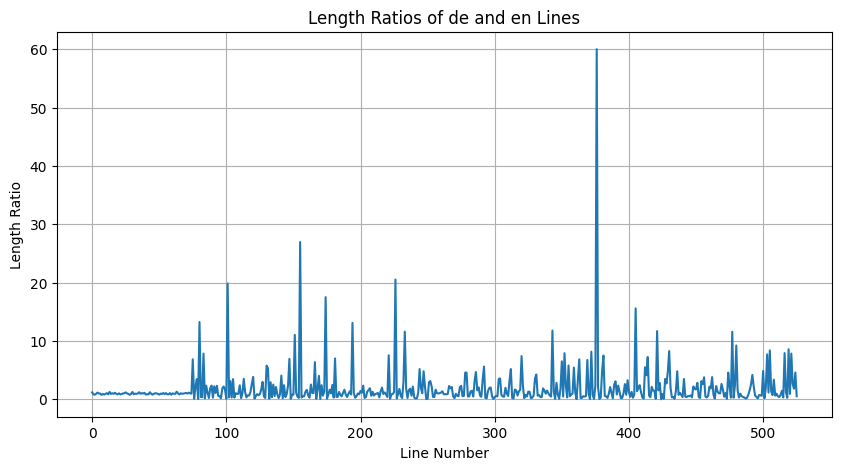

Significant deviation starts at line 75
de line: BRANGÄNE
Da Friede, Sühn' und Freundschaft
von allen ward beschworen,
wir freuten uns all' des Tags;
wie ahnte mir da,
dass dir es Kummer schüf'?
ISOLDE
O blinde Augen!
Blöde Herzen!
Zahmer Mut,
verzagtes Schweigen!
Wie anders prahlte
Tristan aus,
was ich verschlossen hielt!
Die schweigend ihm
das Leben gab,
vor Feindes Rache
ihn schweigend barg;
was stumm ihr Schutz
zum Heil ihm schuf, -
mit ihr gab er es preis!
Wie siegprangend
heil und hehr,
laut und hell
wies er auf mich:
"Das wär ein Schatz,
mein Herr und Ohm;
wie dünkt euch die zur Eh'?
Die schmucke Irin
hol ich her;
mit Steg und Wegen
wohlbekannt,
ein Wink, ich flieg
nach Irenland:
Isolde, die ist euer! -
mir lacht das Abenteuer!"
Fluch dir, Verruchter!
Fluch deinem Haupt!
Rache! Tod!
Tod uns beiden!
en line: Cuando paz, expiación y amistad
todos juraron,
nos alegramos del día;
¿cómo iba a imaginar
que te causaría pena?


In [7]:
with open(f"../libretti/{config.file_prefix}_{config.language}.txt", "r", encoding="utf-8") as f:
    libretto_de = f.read()

with open(f"../libretti/{config.translation_file}", "r", encoding="utf-8") as f:
    libretto_en = f.read()

pairs = pair_libretto_lines_simple(libretto_de, libretto_en)